### Import required modules

In [1]:
# manipulate arrays and have math
import numpy as np
# plot results
import matplotlib.pyplot as plt
# plot them inline in jupyter
%matplotlib inline
# make matplotlib load images
import matplotlib.image as mpimg

## Load  test images

In [2]:
sharp_image = mpimg.imread('picture.png')
soft_image = mpimg.imread('picture_gaussian_10.png')

#### Display the raw images

sharp image


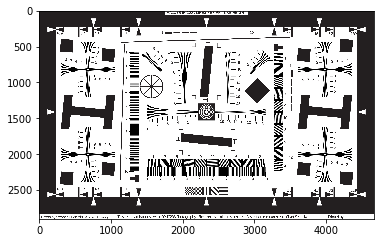

soft image


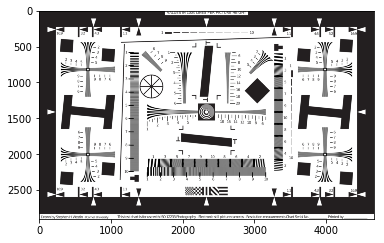

In [3]:
plt.imshow(sharp_image)
print 'sharp image'
plt.show()
plt.imshow(soft_image)
print 'soft image'
plt.show()

#### Extract smaller region from images

In [4]:
sharp_test = sharp_image[1000:1400,2000:2400].copy()
soft_test = soft_image[1000:1400,2000:2400].copy()

#### Display said regions

sharp image


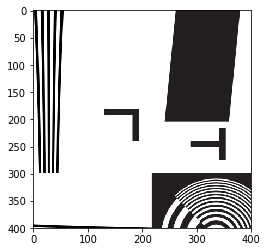

soft image


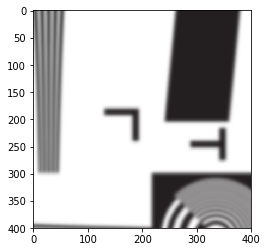

In [5]:
plt.imshow(sharp_test)
print 'sharp image'
plt.show()
plt.imshow(soft_test)
print 'soft image'
plt.show()

#### Again extract smaller region from image, now adding noise and small shift
(hoping to mimick some differences when taking pictures)

In [6]:
sharp_test_noise = sharp_image[1000:1400,2000:2400].copy()
soft_test_noise = soft_image[1005:1405,2012:2412].copy()

In [7]:
# add noise
def noise(data, noise_value):
    noisy_data = data + noise_value * np.random.random([400,400,3]) - noise_value/2
    # shift values to be within bounds
    for value in np.nditer(noisy_data, op_flags=['readwrite']):
        if (value < 0):
            value[...] = np.abs(value)
        if (value > 1):
            value[...] = -value + 2
    return noisy_data

#### Display those images

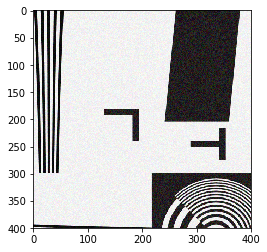

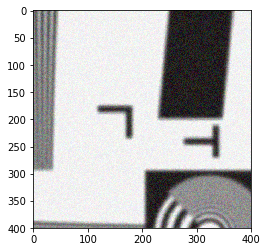

In [8]:
sharp_test_noise = noise(sharp_test_noise, 0.2)
soft_test_noise = noise(soft_test_noise, 0.2)
plt.imshow(sharp_test_noise)
plt.show()
plt.imshow(soft_test_noise)
plt.show()

## Check variance of test images

In [9]:
# compute a variance measure that should prefer a contrasty result, thus a sharper one
def variance_sharpness_metric(data):
    # compute average from one colour channel (greyscale, remember)
    average = np.mean(data[:,:,0])
    # look at variance (yes, there is a np.var call as well)
    variance = (data - average)**2
    # take mean over all pixels
    metric1 = np.mean(variance)
    
    # compare to the built-in one
    metric2 = np.mean(np.var(data[:,:,0]))
    
    return metric1, metric2

#### Clean images first:

In [10]:
print '    metric (sharp) :', variance_sharpness_metric(sharp_test)
print '    metric  (soft) :', variance_sharpness_metric(soft_test)

    metric (sharp) : (0.15877226, 0.15623356)
    metric  (soft) : (0.11452843, 0.11244982)


#### Now the 'realistic' images:

In [11]:
print '    metric (sharp) :', variance_sharpness_metric(sharp_test_noise)
print '    metric  (soft) :', variance_sharpness_metric(soft_test_noise)

    metric (sharp) : (0.1405385421623605, 0.1382244902874242)
    metric  (soft) : (0.10286790964636182, 0.10097473866460273)


### Check robustness of metric, looking at the ratio of things
A higher ratio should hint towards a clearer identification (or so the idea)

In [12]:
print '    ratio/cleanliness of results:', \
variance_sharpness_metric(sharp_test_noise)[0]/variance_sharpness_metric(soft_test_noise)[0]

    ratio/cleanliness of results: 1.3662039274
